In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
sns.set()
%matplotlib inline

In [156]:
arquivo_excel = pd.ExcelFile("desafio.xlsx")

In [157]:
arquivo_excel.sheet_names

['HELLO', 'Dados - Questão 1', 'Dados - Questão 2']

In [158]:
dados1 = arquivo_excel.parse("Dados - Questão 1")
dados2 = arquivo_excel.parse("Dados - Questão 2")

In [159]:
dados1.head()

,num_compra,usuario,nome,dados,Filial,data_compra,valor_compra,Imposto,Informado sobre imposto?
0,24937847,295,Daniel,12,Loja Armando Mendes,2019-01-06 11:53:01,129.120,2.603920,Sim
1,23600787,295,Daniel,12,Loja Manoa,2019-06-01 17:27:11,95.964,1.935274,Sim
2,24298956,295,Daniel,12,Loja Manoa,2019-06-22 16:40:21,506.052,10.205382,Sim
3,23802765,331,Alex,12,Loja Manoa,2019-06-11 20:10:43,586.200,11.821700,Sim
4,22559356,331,Alex,12,Loja Manoa,2019-05-14 19:26:41,57.864,1.166924,Sim


In [160]:
dados2.head()

,Loja,data_compra,inicio,termino,Loja.1,codloja,produto,EAN,quantidade,valor_total,Imposto
0,430,2019-07-05 10:30:41,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,1,9.226,1.5816
1,430,2019-07-05 11:58:18,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,1,9.226,1.5816
2,430,2019-07-05 14:06:58,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,1,9.226,1.5816
3,430,2019-07-05 14:50:06,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,1,9.226,1.5816
4,430,2019-07-05 16:04:56,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,3,27.678,4.7448


In [161]:
#produto mais vendido na tabela 2
mais_vendidos=pd.pivot_table(dados2, index=["produto"], values="quantidade", aggfunc="sum").sort_values(ascending=False,by="quantidade")
print(mais_vendidos)

              quantidade
produto                 
Açaí 1L              788
Açaí 1L Zero         485


In [162]:
#nome dos produtos mais vendidos
prods = [s.strip() for s in mais_vendidos.index.tolist()]

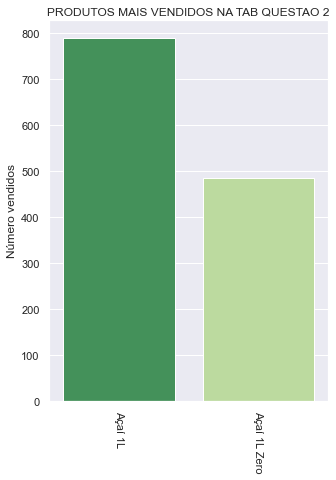

In [163]:
# plotagem do gráfico 
plt.figure(figsize=(5,7))
g=sns.barplot(x = prods , y = mais_vendidos.quantidade ,palette="YlGn_r")
g.set_xticklabels(prods,rotation=270)
g.set_ylabel("Número vendidos");
g.set_title("PRODUTOS MAIS VENDIDOS NA TAB QUESTAO 2");

In [164]:
#Venda por vendedor na tabela 1
venda_x_vendedor=pd.pivot_table(dados1, index=["nome"], values="usuario", aggfunc="count").sort_values(['usuario'], ascending=False)
print(venda_x_vendedor)

             usuario
nome                
Thiago           558
Irineu           539
Vyctor           238
Pedro            199
Rafael           188
...              ...
Leon               1
Lennon             1
Leciane Báo        1
Leander            1
Íris               1

[841 rows x 1 columns]


In [165]:
#nome dos vendedores
vend = [s.strip() for s in venda_x_vendedor.index.tolist()]

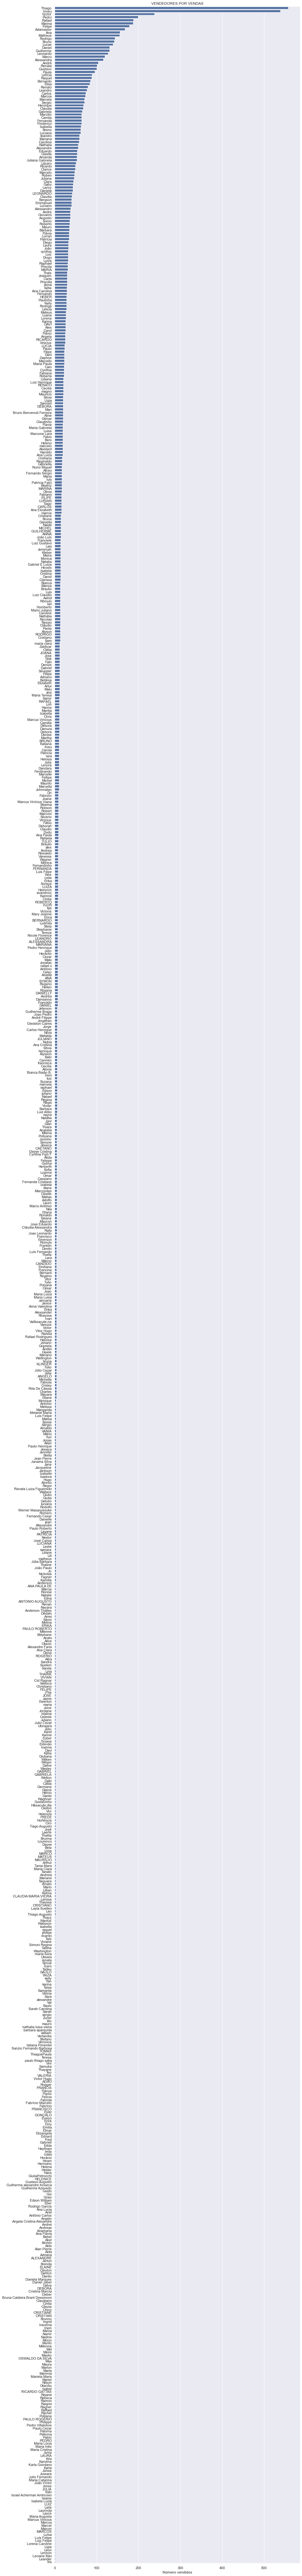

In [166]:
# plotagem do gráfico dos vendedores
plt.figure(figsize=(14,150))
g=sns.barplot(x = venda_x_vendedor.usuario, y = vend, color="b")
g.set_xlabel("Número vendidos");
g.set_title("VENDEDORES POR VENDAS");

In [167]:
#Top 5 vendedor por unidade na tabela 1
vendedor_filial_x_vendas=pd.pivot_table(dados1, index=["nome", "Filial"], values="usuario", aggfunc="count")
vendedor_filial_x_vendas.sort_values(['Filial', 'usuario'], ascending=False).groupby('Filial').head(1)

usuario
nome   Filial                      
Irineu Loja Manoa               217
       Loja Cachoerinha         297
Thiago Loja Armando Mendes      198

In [168]:
dados1["data_compra"] = [s.strftime("%m/%d/%Y") for s in dados1["data_compra"]]
vendas_x_tempo=pd.pivot_table(dados1, index=["data_compra"], values="usuario", aggfunc="count")
print(vendas_x_tempo)

             usuario
data_compra         
01/01/2019       312
01/02/2019       119
01/03/2019       131
01/04/2019       116
01/05/2019       132
...              ...
06/26/2019       108
06/27/2019       111
06/28/2019        93
06/29/2019       130
06/30/2019       173

[89 rows x 1 columns]


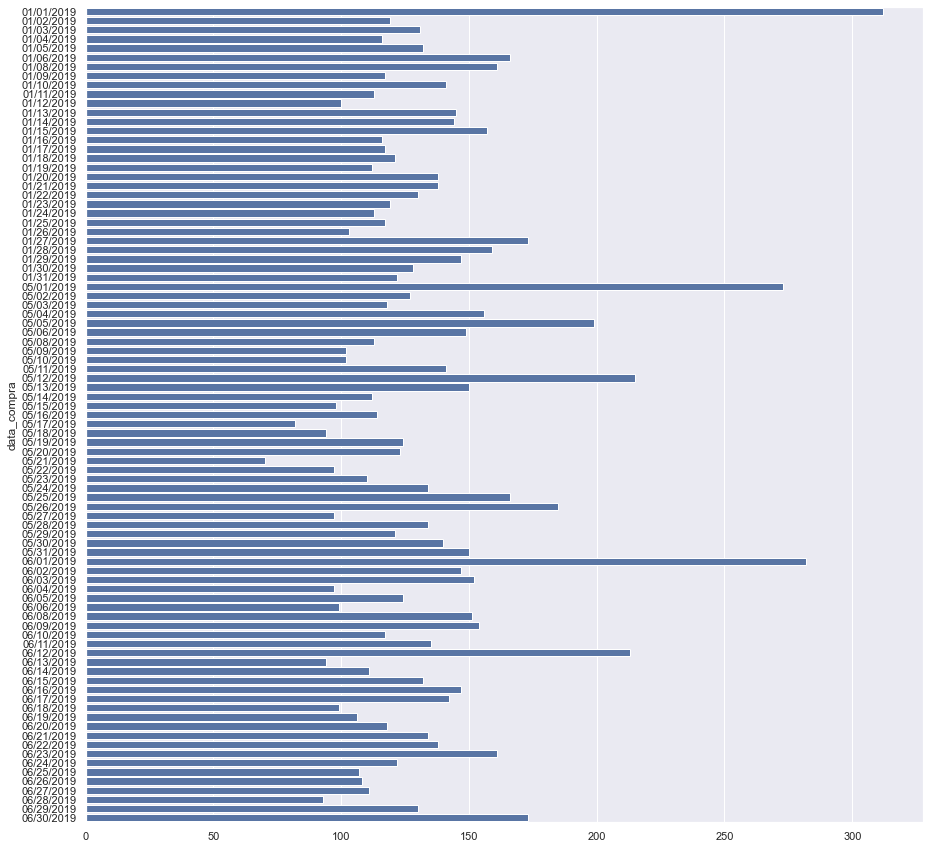

In [169]:
plt.figure(figsize=(15,15))
quant = vendas_x_tempo.usuario.tolist()
g=sns.barplot(x = quant , y = vendas_x_tempo.index, color="b")

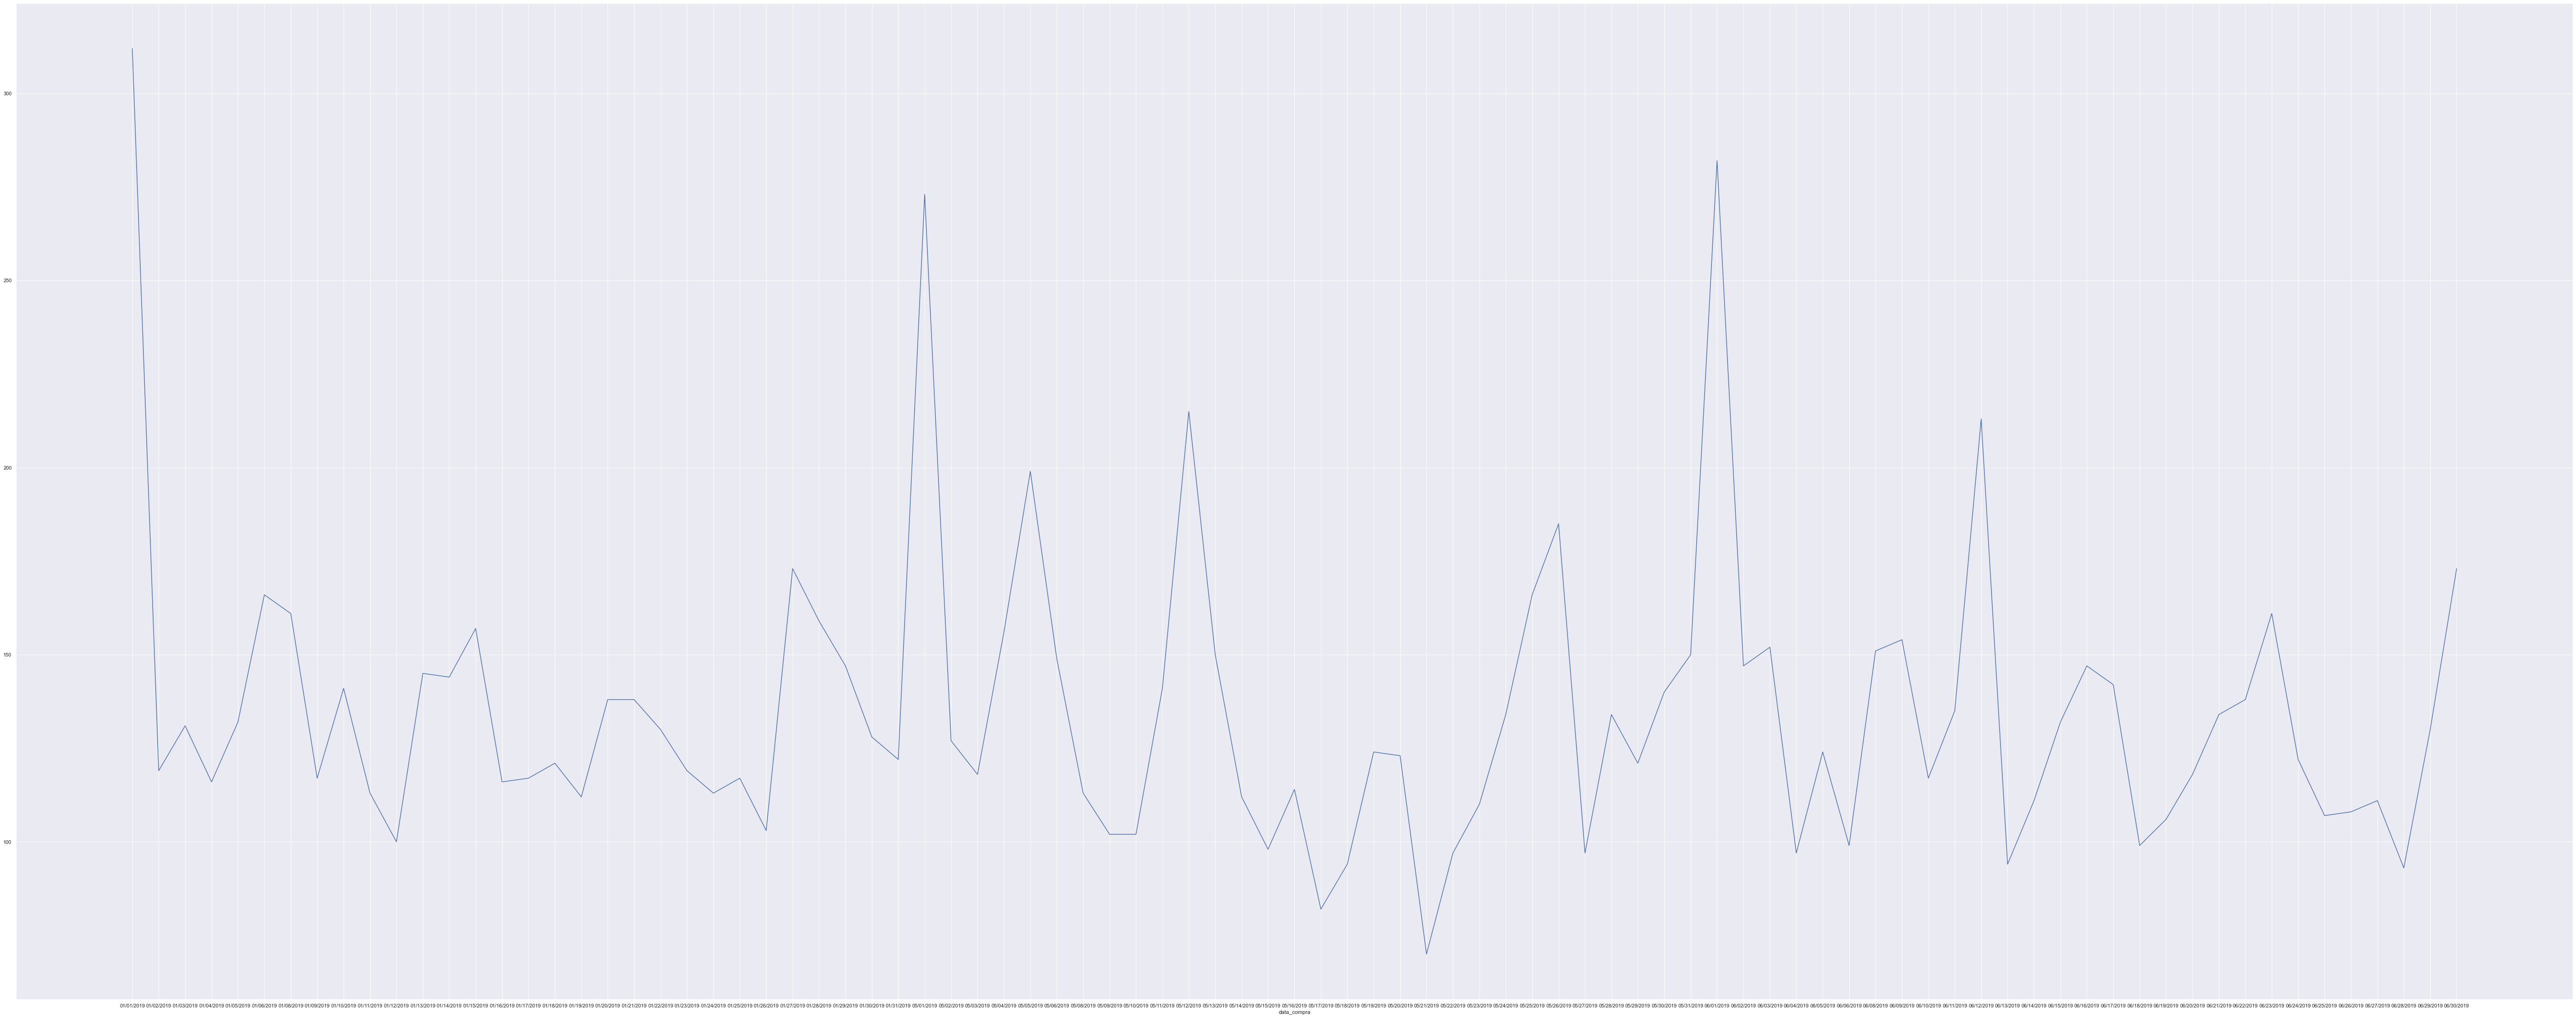

In [170]:
plt.figure(figsize=(100,40))
g=sns.lineplot(x = vendas_x_tempo.index, y = quant, color="b")
g.set_title("VENDAS POR DATA");